In [1]:
import sys
sys.path.append("../")

from src.models.ViT_Model import create_model
import torch
from PIL import Image
import numpy as np

device = torch.device("cuda:0")

# Load some example images

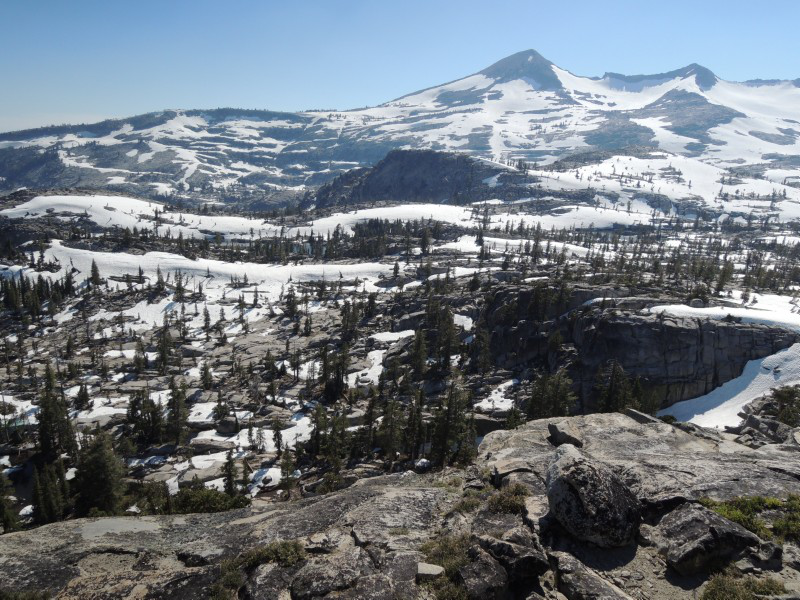

In [14]:
img1 = Image.open("../images/example/0_e8b9b9a19ebf6a0d.jpg")
img2 = Image.open("../images/example/0_ff075584fa3ac3fe.jpg")
img3 = Image.open("../images/example/1_02b09bb030cf5687.jpg")
img4 = Image.open("../images/example/1_069bd3186f7c6be8.jpg")
images = [img1, img2, img3, img4]

display(img1)

# Load the Neural Network "ViT-B" or "ViT-L"

In [5]:
check_pth = "/path/to/downloaded/GPNNS_ViTB.pth"
model, transform_fn = create_model(model_name = "ViT-B", check_pth=check_pth) 
model.to(device)
model.eval();

# Scale the images and store them on the device

In [16]:
prepared_image_list = []
for img in images:
    prepared_image_list.append(transform_fn(img).half().to(device))
prepared_images = torch.stack(prepared_image_list)
print(prepared_images.shape)

torch.Size([4, 3, 224, 224])


# Compute the features for the images and copy them to the CPU

In [31]:
out = model(prepared_images)
fv = out.cpu().detach().numpy()
print(fv.shape)
fv

(4, 768)


array([[-0.1681 ,  0.4482 ,  0.8564 , ..., -1.301  ,  1.038  , -1.121  ],
       [ 1.028  ,  0.538  , -0.574  , ..., -0.3357 ,  0.3403 ,  0.02193],
       [ 0.2438 ,  0.7163 ,  0.3801 , ..., -2.342  ,  0.1858 , -0.968  ],
       [ 0.1719 ,  0.845  , -0.3032 , ..., -1.941  , -0.458  ,  0.2068 ]],
      dtype=float16)

# Optional compute the binary feature

In [30]:
# binary embeddings
bv = np.uint8((fv > 0))
print(bv.shape)
bv

(4, 768)


array([[0, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 1]], dtype=uint8)

# Use image 1 as a query

In [34]:
query = fv[0]
for i in range(fv.shape[0]):
    dist = np.linalg.norm(query-fv[i])
    print("distance to image", i, "is", dist)

distance to image 0 is 0.0
distance to image 1 is 23.1
distance to image 2 is 36.12
distance to image 3 is 35.28


# Repeat the search with the binary features

In [35]:
query = bv[0]
for i in range(bv.shape[0]):
    dist = np.linalg.norm(query-bv[i])
    print("distance to image", i, "is", dist)

distance to image 0 is 0.0
distance to image 1 is 2770.0294222264138
distance to image 2 is 3579.122518160003
distance to image 3 is 3477.761780225897
